In [2]:
# Instalar dependencias
!pip install snowflake-connector-python pandas matplotlib seaborn

import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Conexión a Snowflake

conn = snowflake.connector.connect(
    account='omxopkd-zn83444',
    user='marumoncayo',
    password='Marumoncayo260503',
    role='ACCOUNTADMIN',
    warehouse='COMPUTE_WH',
    database='NY_TAXI',
    schema='SILVER_GOLD'
)

print(" Conectado a Snowflake")

 Conectado a Snowflake


/tmp/ipython-input-4161954973.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1_pickup = pd.read_sql(query1_pickup, conn)


=== TOP 10 ZONAS PICKUP - ENERO 2024 ===


,YEAR,MONTH,ZONE_NAME,BOROUGH,TOTAL_TRIPS
0,2024,1,JFK Airport,Queens,138154
1,2024,1,Upper East Side South,Manhattan,137092
2,2024,1,Midtown Center,Manhattan,136498
3,2024,1,Upper East Side North,Manhattan,130233
4,2024,1,Midtown East,Manhattan,102309
5,2024,1,Penn Station/Madison Sq West,Manhattan,100736
6,2024,1,Times Sq/Theatre District,Manhattan,100008
7,2024,1,Lincoln Square East,Manhattan,98907
8,2024,1,LaGuardia Airport,Queens,87266
9,2024,1,Upper West Side South,Manhattan,82393


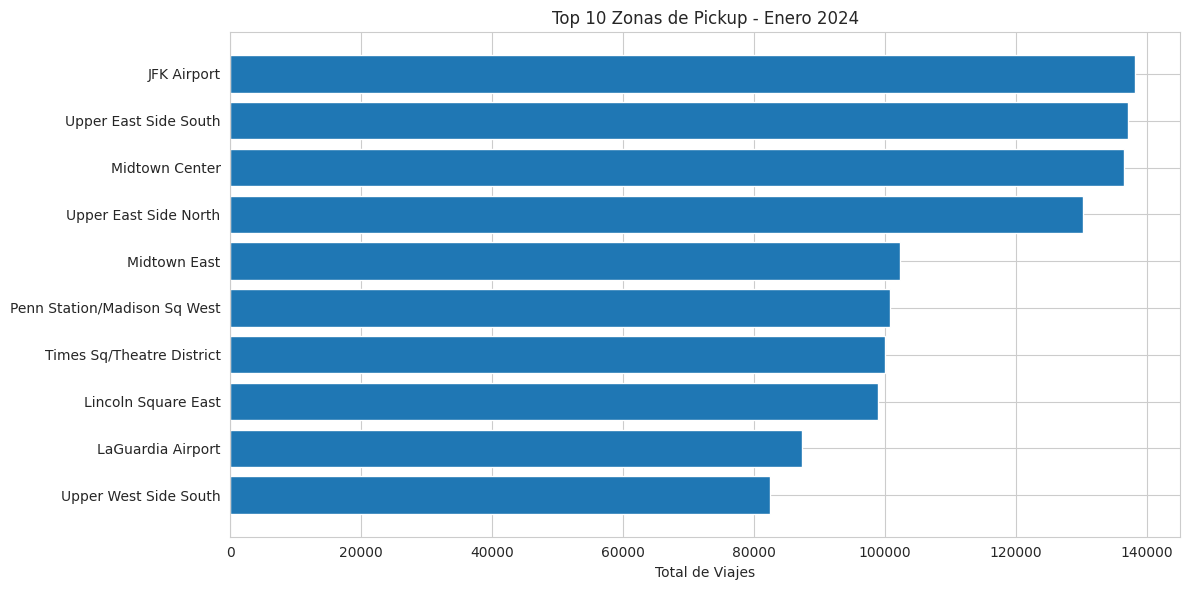

In [3]:
# PREGUNTA 1: Top 10 zonas con más viajes por mes (Pickup)
query1_pickup = """
SELECT
    dd.year,
    dd.month,
    dz.zone_name,
    dz.borough,
    COUNT(*) as total_trips
FROM fct_trips f
JOIN dim_date dd ON f.pickup_date_sk = dd.date_sk
JOIN dim_zone dz ON f.pickup_zone_sk = dz.zone_sk
WHERE dd.year = 2024 AND dd.month = 1
GROUP BY dd.year, dd.month, dz.zone_name, dz.borough
ORDER BY total_trips DESC
LIMIT 10
"""

df1_pickup = pd.read_sql(query1_pickup, conn)
print("=== TOP 10 ZONAS PICKUP - ENERO 2024 ===")
display(df1_pickup)

# Gráfico
plt.figure(figsize=(12, 6))
plt.barh(df1_pickup['ZONE_NAME'], df1_pickup['TOTAL_TRIPS'])
plt.xlabel('Total de Viajes')
plt.title('Top 10 Zonas de Pickup - Enero 2024')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [4]:
# Top 10 zonas Dropoff
query1_dropoff = """
SELECT
    dd.year,
    dd.month,
    dz.zone_name,
    dz.borough,
    COUNT(*) as total_trips
FROM fct_trips f
JOIN dim_date dd ON f.dropoff_date_sk = dd.date_sk
JOIN dim_zone dz ON f.dropoff_zone_sk = dz.zone_sk
WHERE dd.year = 2024 AND dd.month = 1
GROUP BY dd.year, dd.month, dz.zone_name, dz.borough
ORDER BY total_trips DESC
LIMIT 10
"""

df1_dropoff = pd.read_sql(query1_dropoff, conn)
print("=== TOP 10 ZONAS DROPOFF - ENERO 2024 ===")
display(df1_dropoff)

/tmp/ipython-input-3910131836.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1_dropoff = pd.read_sql(query1_dropoff, conn)


=== TOP 10 ZONAS DROPOFF - ENERO 2024 ===


,YEAR,MONTH,ZONE_NAME,BOROUGH,TOTAL_TRIPS
0,2024,1,Upper East Side North,Manhattan,140415
1,2024,1,Upper East Side South,Manhattan,126050
2,2024,1,Midtown Center,Manhattan,106648
3,2024,1,Upper West Side South,Manhattan,86432
4,2024,1,Lincoln Square East,Manhattan,86246
5,2024,1,Times Sq/Theatre District,Manhattan,85388
6,2024,1,Murray Hill,Manhattan,82063
7,2024,1,Midtown East,Manhattan,81152
8,2024,1,Lenox Hill West,Manhattan,80519
9,2024,1,Upper West Side North,Manhattan,73468


/tmp/ipython-input-2578247480.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


=== INGRESOS Y PROPINAS POR BOROUGH ===


,BOROUGH,YEAR,MONTH,TOTAL_REVENUE,TOTAL_TIPS,TIP_PERCENTAGE
0,Manhattan,2024,1,44745058.05,7446580.75,19.964838
1,Queens,2024,1,16170579.94,2236720.55,16.052412
2,Brooklyn,2024,1,774322.83,60762.49,8.515396
3,Unknown,2024,1,215203.60,32635.43,17.875750
4,Bronx,2024,1,182751.22,1544.74,0.852475
5,nan,2024,1,43819.26,4316.13,10.926046
6,EWR,2024,1,4652.31,517.96,12.528209
7,Staten Island,2024,1,2021.58,190.58,10.408520
8,Manhattan,2024,2,45868047.65,7661324.93,20.052295
9,Queens,2024,2,14821355.31,2077106.14,16.298380


<Figure size 1400x600 with 0 Axes>

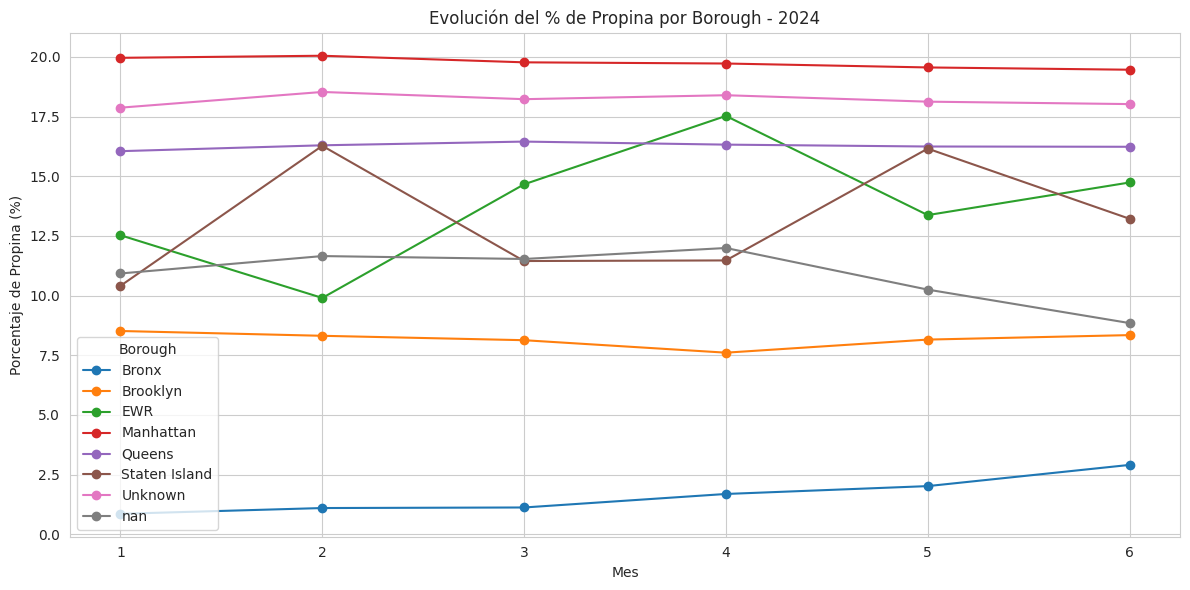

In [5]:
# PREGUNTA 2: Ingresos y propinas por borough y mes
query2 = """
SELECT
    dz.borough,
    dd.year,
    dd.month,
    SUM(f.total_amount) as total_revenue,
    SUM(f.tip_amount) as total_tips,
    (SUM(f.tip_amount) / NULLIF(SUM(f.fare_amount), 0) * 100) as tip_percentage
FROM fct_trips f
JOIN dim_date dd ON f.pickup_date_sk = dd.date_sk
JOIN dim_zone dz ON f.pickup_zone_sk = dz.zone_sk
WHERE dd.year = 2024 AND dd.month <= 6
GROUP BY dz.borough, dd.year, dd.month
ORDER BY dd.year, dd.month, total_revenue DESC
"""

df2 = pd.read_sql(query2, conn)
print("=== INGRESOS Y PROPINAS POR BOROUGH ===")
display(df2.head(20))

# Gráfico
plt.figure(figsize=(14, 6))
pivot = df2.pivot_table(values='TIP_PERCENTAGE', index='MONTH', columns='BOROUGH')
pivot.plot(kind='line', marker='o')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Propina (%)')
plt.title('Evolución del % de Propina por Borough - 2024')
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3525964101.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


=== VELOCIDAD PROMEDIO POR HORA Y BOROUGH ===


,BOROUGH,PICKUP_HOUR,FRANJA,AVG_SPEED,TOTAL_TRIPS
0,Bronx,0,Nocturno,16.333108,211645
1,Bronx,1,Nocturno,16.575934,155001
2,Bronx,2,Nocturno,17.057992,107534
3,Bronx,3,Nocturno,17.786392,84234
4,Bronx,4,Nocturno,18.414821,89024
5,Bronx,5,Nocturno,19.354802,101936
6,Bronx,6,Diurno,16.793987,177611
7,Bronx,7,Diurno,12.910127,329412
8,Bronx,8,Diurno,12.353665,445032
9,Bronx,9,Diurno,13.327669,411413


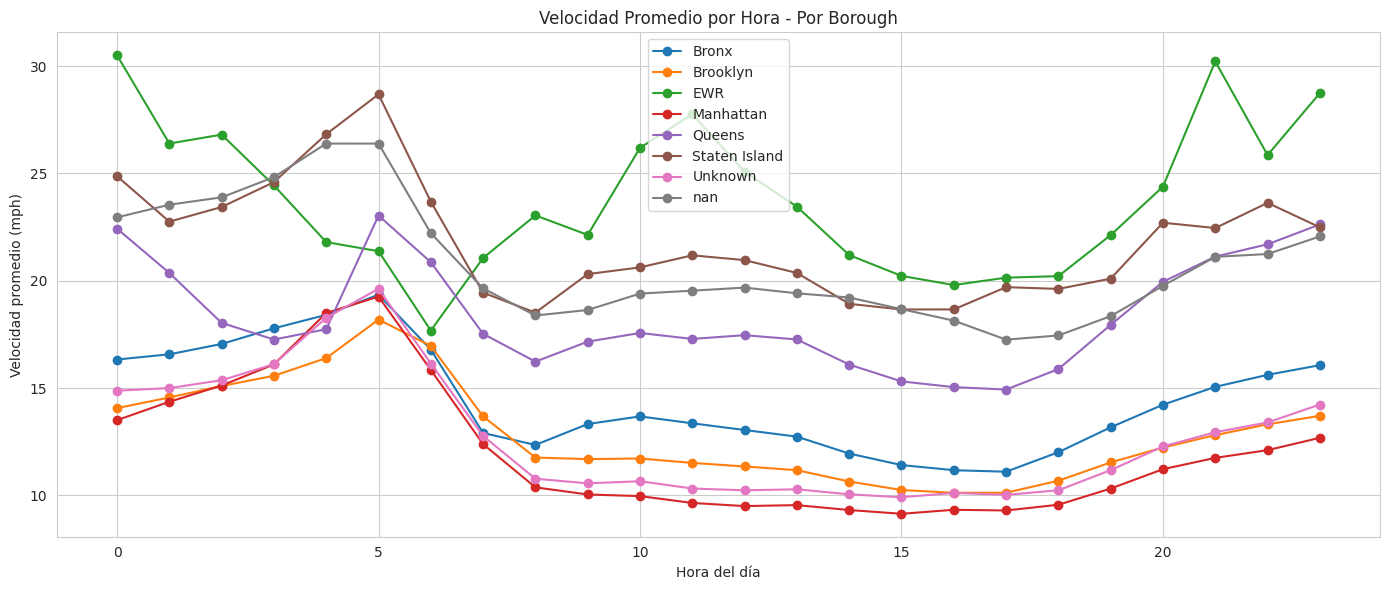

In [6]:
# PREGUNTA 3: Velocidad promedio por franja horaria y borough
query3 = """
SELECT
    dz.borough,
    f.pickup_hour,
    CASE
        WHEN f.pickup_hour BETWEEN 6 AND 18 THEN 'Diurno'
        ELSE 'Nocturno'
    END as franja,
    AVG(f.avg_speed_mph) as avg_speed,
    COUNT(*) as total_trips
FROM fct_trips f
JOIN dim_zone dz ON f.pickup_zone_sk = dz.zone_sk
WHERE f.avg_speed_mph > 0
  AND f.avg_speed_mph < 100
  AND dz.borough IS NOT NULL
GROUP BY dz.borough, f.pickup_hour, franja
ORDER BY dz.borough, f.pickup_hour
"""

df3 = pd.read_sql(query3, conn)
print("=== VELOCIDAD PROMEDIO POR HORA Y BOROUGH ===")
display(df3.head(20))

# Gráfico
plt.figure(figsize=(14, 6))
for borough in df3['BOROUGH'].unique():
    data = df3[df3['BOROUGH'] == borough]
    plt.plot(data['PICKUP_HOUR'], data['AVG_SPEED'], marker='o', label=borough)

plt.xlabel('Hora del día')
plt.ylabel('Velocidad promedio (mph)')
plt.title('Velocidad Promedio por Hora - Por Borough')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3392869374.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


=== PERCENTILES DE DURACIÓN POR ZONA ===


,ZONE_NAME,BOROUGH,P50_DURATION,P90_DURATION,TOTAL_TRIPS
0,Upper East Side South,Manhattan,9.0,22.0,31613320
1,Midtown Center,Manhattan,12.0,26.0,29394683
2,Upper East Side North,Manhattan,9.0,23.0,28867234
3,Penn Station/Madison Sq West,Manhattan,13.0,27.0,26045913
4,Midtown East,Manhattan,11.0,25.0,25968113
5,Times Sq/Theatre District,Manhattan,12.0,29.0,24790321
6,Murray Hill,Manhattan,11.0,24.0,23975857
7,Union Sq,Manhattan,11.0,24.0,23446393
8,Clinton East,Manhattan,10.0,25.0,23226839
9,Lincoln Square East,Manhattan,10.0,23.0,22561358


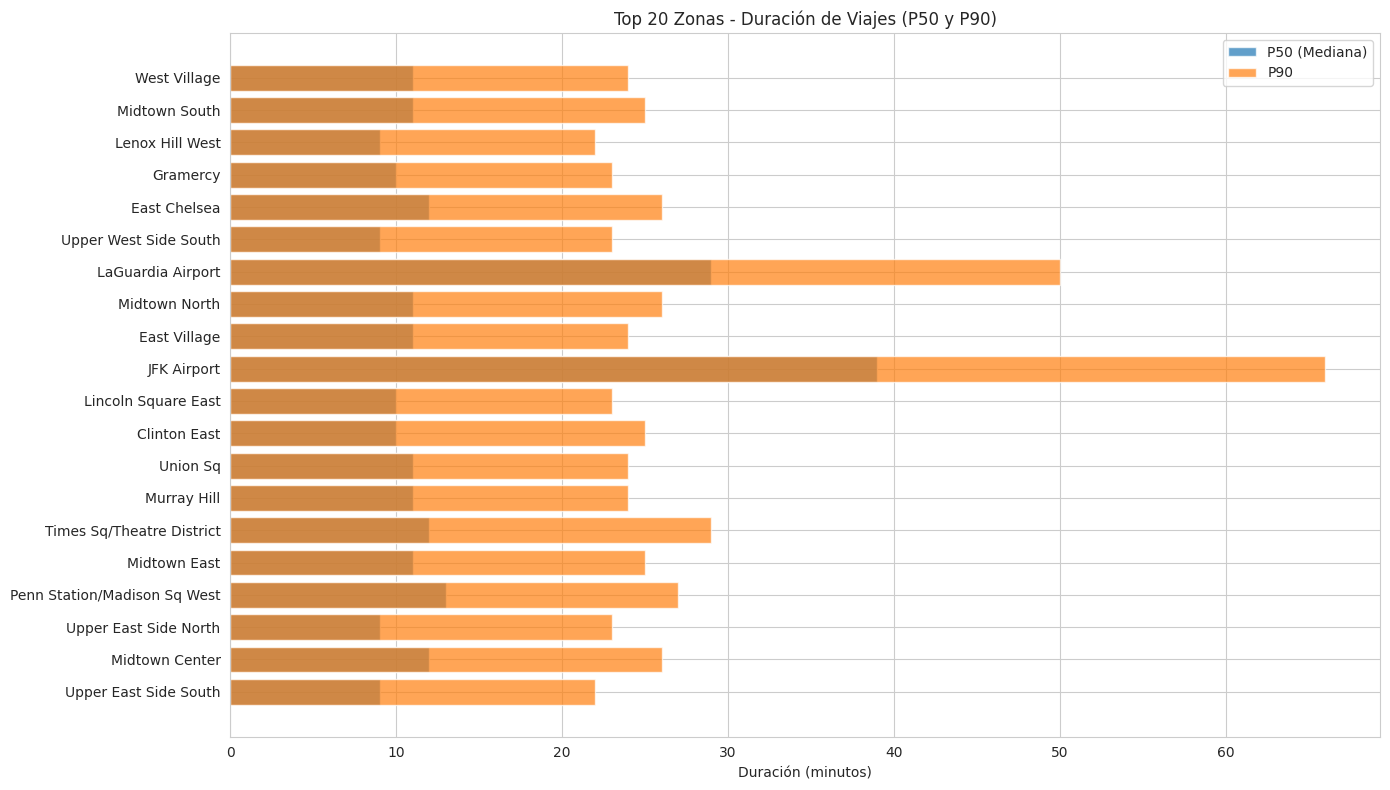

In [7]:
# PREGUNTA 4: Percentiles de duración por zona pickup
query4 = """
SELECT
    dz.zone_name,
    dz.borough,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY f.trip_duration_minutes) as p50_duration,
    PERCENTILE_CONT(0.9) WITHIN GROUP (ORDER BY f.trip_duration_minutes) as p90_duration,
    COUNT(*) as total_trips
FROM fct_trips f
JOIN dim_zone dz ON f.pickup_zone_sk = dz.zone_sk
WHERE f.trip_duration_minutes > 0
  AND f.trip_duration_minutes < 120
  AND dz.zone_name IS NOT NULL
GROUP BY dz.zone_name, dz.borough
ORDER BY total_trips DESC
LIMIT 20
"""

df4 = pd.read_sql(query4, conn)
print("=== PERCENTILES DE DURACIÓN POR ZONA ===")
display(df4)

# Gráfico
plt.figure(figsize=(14, 8))
x = range(len(df4))
plt.barh(x, df4['P50_DURATION'], label='P50 (Mediana)', alpha=0.7)
plt.barh(x, df4['P90_DURATION'], label='P90', alpha=0.7)
plt.yticks(x, df4['ZONE_NAME'])
plt.xlabel('Duración (minutos)')
plt.title('Top 20 Zonas - Duración de Viajes (P50 y P90)')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# PREGUNTA 5: Distribución temporal - horas pico
query5 = """
SELECT
    dd.day_name,
    f.pickup_hour,
    COUNT(*) as total_trips
FROM fct_trips f
JOIN dim_date dd ON f.pickup_date_sk = dd.date_sk
WHERE dd.year = 2024
GROUP BY dd.day_name, f.pickup_hour
ORDER BY total_trips DESC
LIMIT 50
"""

df5 = pd.read_sql(query5, conn)
print("=== DISTRIBUCIÓN TEMPORAL - HORAS PICO ===")
display(df5.head(20))



/tmp/ipython-input-3304293551.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, conn)


=== DISTRIBUCIÓN TEMPORAL - HORAS PICO ===


,DAY_NAME,PICKUP_HOUR,TOTAL_TRIPS
0,Thu,18,437591
1,Wed,18,426947
2,Tue,18,414704
3,Thu,17,412440
4,Wed,17,403007
5,Fri,18,399579
6,Tue,17,392309
7,Thu,19,383293
8,Fri,17,378007
9,Wed,19,370239
